# Task 9 of Second Machine Learning Homework
## Gradient Descent for Non-linear Data

**Dataset**: Use the following code to generate a dataset of 100 samples:

```py
np.random.seed(5)
X = np.random.uniform(-2 * np.pi, 2 * np.pi, 100)
epsilon = np.random.normal(0, 0.1, 100)
y = np.sin(X) + epsilon
```

**Task**: Implement gradient descent to fit a linear model to this dataset. Discuss the challenges and limitations of fitting a linear model to non-linear data.

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split

# Dataset generation
np.random.seed(5)
X = np.random.uniform(-2 * np.pi, 2 * np.pi, 100)
epsilon = np.random.normal(0, 0.1, 100)
y = np.sin(X) + epsilon

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

### Gradient descent function from previous tasks

In [3]:
import torch

def train_linear_regression(X, y, num_epochs=1000, lr=0.1):
    class LinearRegressionModel(torch.nn.Module):
        def __init__(self):
            super(LinearRegressionModel, self).__init__()
            self.linear = torch.nn.Linear(1, 1)

        def forward(self, x):
            return self.linear(x)
        
    
    # Normalize the input between 0 and 1
    X_min, X_max = X.min(), X.max()
    X_scaled = (X - X_min) / (X_max - X_min)
    
    X_tensor = torch.tensor(X_scaled, dtype=torch.float32).view(-1, 1)
    y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

    model = LinearRegressionModel()

    # Define MSE loss and optimizer functions
    criterion = torch.nn.MSELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    
    # Save min loss
    min_loss = float('inf')

    # Train
    for epoch in range(num_epochs):
        y_pred = model(X_tensor)
        loss = criterion(y_pred, y_tensor)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if loss.item() < min_loss:
            min_loss = loss.item()

        # Print the loss every 1000 epochs
        if (epoch + 1) % 1000 == 0:
            print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

    return model, X_min, X_max, min_loss


### Train model and plot the data

Epoch [1000/1000], Loss: 4766.4849


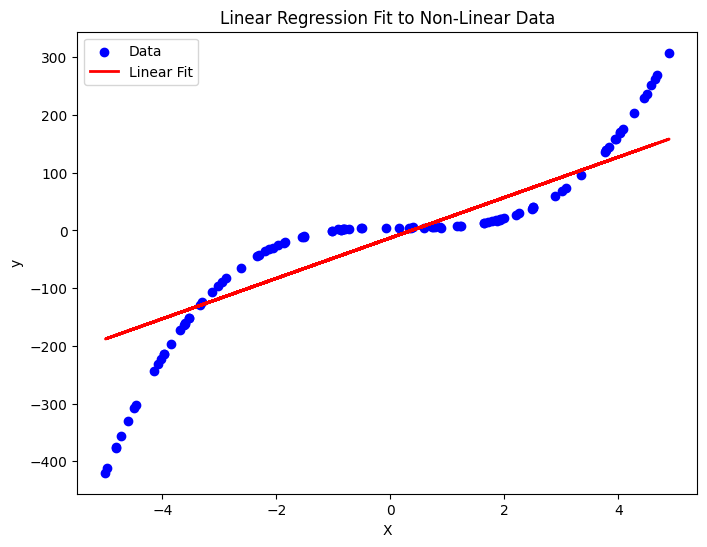

In [6]:
import matplotlib.pyplot as plt

model, X_min, X_max, min_loss = train_linear_regression(X, y, num_epochs=1000, lr=0.01)

X_tensor = torch.tensor((X - X_min) / (X_max - X_min), dtype=torch.float32).view(-1, 1)
y_pred = model(X_tensor).detach().numpy()

plt.figure(figsize=(8, 6))
plt.scatter(X, y, label='Data', color='blue')
plt.plot(X, y_pred, label='Linear Fit', color='red', linewidth=2)
plt.title("Linear Regression Fit to Non-Linear Data")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


### Conclusions

We cannot fit linear model well to non-linear data. Main conclussion there is that
we should use correct tools for a given task. Task 4 was quite similar and I have shown
there that it was way more accurate (but in this case we would overfit to given data).